In [1]:
import os
from os import path
from datetime import datetime
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 5)

# sns.set_theme(style="darkgrid")

In [3]:
filename = path.join('..', 'data', 'raw', 'BOLETIM_DIARIO_CORONAVIRUS_SAP.xlsx')

assert path.exists(filename), f"Caminho para o arquivo não existe:\n{filename}"

In [4]:
frame = pd.read_excel(filename,
                   index_col="DATA",
                   parse_dates=['DATA'],
                   engine='openpyxl')

In [5]:
frame.head()

,DESCARTADOS,EM INVESTIGACAO,CONFIRMADOS,EXAMINADOS,RECUPERADOS,ATIVOS,HOSPITAL,DOMICILIO,OBITOS
DATA,,,,,,,,,
2020-07-03,690,263,105,1058,63,38,3,35,4
2020-07-04,709,251,109,1069,65,43,3,40,4
2020-07-05,711,252,110,1073,71,35,3,32,4
2020-07-06,722,293,121,1136,79,38,2,36,4
2020-07-07,794,264,126,1184,85,37,4,33,4


In [6]:
frame.tail()

,DESCARTADOS,EM INVESTIGACAO,CONFIRMADOS,EXAMINADOS,RECUPERADOS,ATIVOS,HOSPITAL,DOMICILIO,OBITOS
DATA,,,,,,,,,
2021-03-08,6268,169,1574,8011,1310,227,11,216,37
2021-03-09,6306,186,1602,8094,1329,236,12,224,37
2021-03-10,6358,288,1629,8275,1347,245,12,233,37
2021-03-11,6403,301,1651,8355,1356,258,12,246,37
2021-03-12,6467,276,1698,8441,1377,284,14,270,37


In [7]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-07-03 to 2021-03-12
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   DESCARTADOS      253 non-null    int64
 1   EM INVESTIGACAO  253 non-null    int64
 2   CONFIRMADOS      253 non-null    int64
 3   EXAMINADOS       253 non-null    int64
 4   RECUPERADOS      253 non-null    int64
 5   ATIVOS           253 non-null    int64
 6   HOSPITAL         253 non-null    int64
 7   DOMICILIO        253 non-null    int64
 8   OBITOS           253 non-null    int64
dtypes: int64(9)
memory usage: 19.8 KB


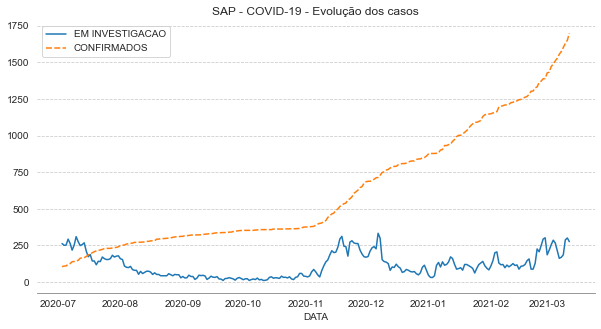

In [8]:
params = {
    'axes.facecolor' : 'white',
    'axes.titlesize' : 'larger', 
    'axes.titleweight' : 'bold',
    'axes.edgecolor': 'gray',
    "axes.grid" : True,
    "grid.linewidth": 0.9,
    'grid.linestyle': '--', 
    'axes.grid.which' : 'major'
    }
# sns.set_theme(params)
sns.set_style("whitegrid", params)
# sns.set_context("paper", rc=params)

ax = sns.lineplot(data=frame[['EM INVESTIGACAO', 'CONFIRMADOS']],
            palette="tab10"
            )

_ = ax.set_title("SAP - COVID-19 - Evolução dos casos")

ax.xaxis.grid(False)
sns.despine(left=True)

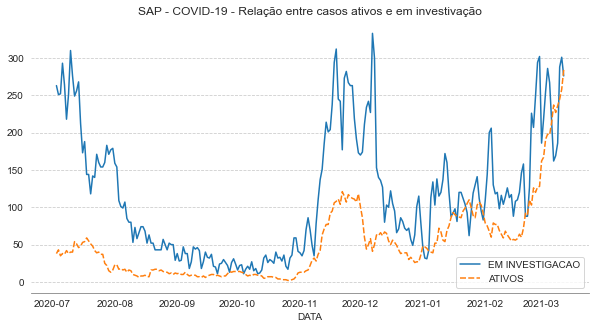

In [9]:
ax = sns.lineplot(data=frame[['EM INVESTIGACAO', 'ATIVOS']],
            palette="tab10"
            )

_ = ax.set_title("SAP - COVID-19 - Relação entre casos ativos e em investivação")

ax.xaxis.grid(False)
sns.despine(left=True)

In [10]:
# from matplotlib import rcParams

# rcParams.keys()

In [11]:
# sns.axes_style()

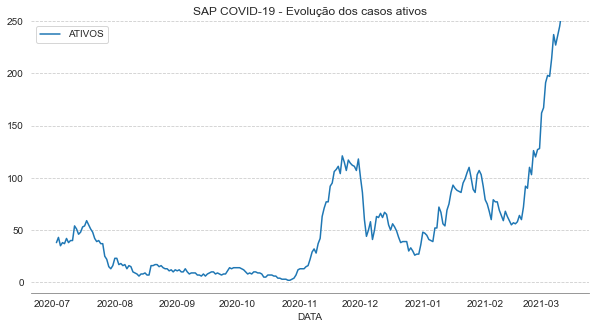

In [12]:
ax = sns.lineplot(data=frame[['ATIVOS']])
_ = ax.set_title("SAP COVID-19 - Evolução dos casos ativos")

ax.xaxis.grid()
ax.set_ylim([-10, 250])
sns.despine(left=True)

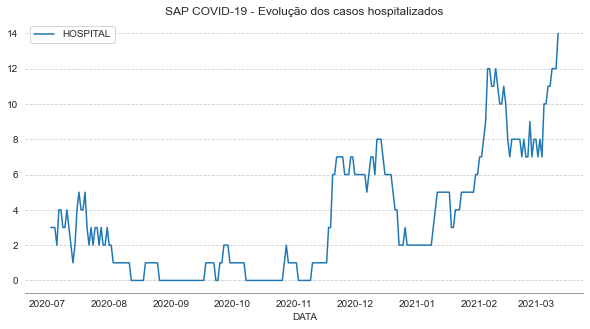

In [13]:
ax = sns.lineplot(data=frame[['HOSPITAL']],
             palette="tab10"
            )
_ = ax.set_title("SAP COVID-19 - Evolução dos casos hospitalizados")

# ax.set_ylim([-10, 250])
ax.xaxis.grid()
sns.despine(left=True)


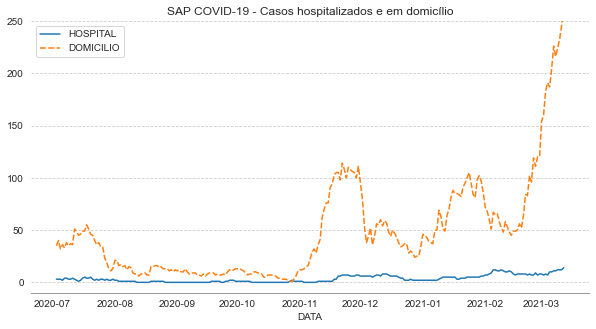

In [14]:
ax = sns.lineplot(data=frame[['HOSPITAL', 'DOMICILIO']],
             palette="tab10"
            )
_ = ax.set_title("SAP COVID-19 - Casos hospitalizados e em domicílio")

ax.set_ylim([-10, 250])
ax.xaxis.grid()
sns.despine(left=True)

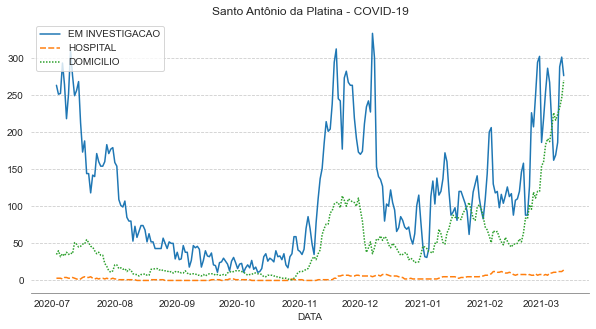

In [15]:
ax = sns.lineplot(data=frame[['EM INVESTIGACAO', 'HOSPITAL', 'DOMICILIO']],
             palette="tab10"
            )
_ = ax.set_title("Santo Antônio da Platina - COVID-19")

ax.xaxis.grid()
sns.despine(left=True)

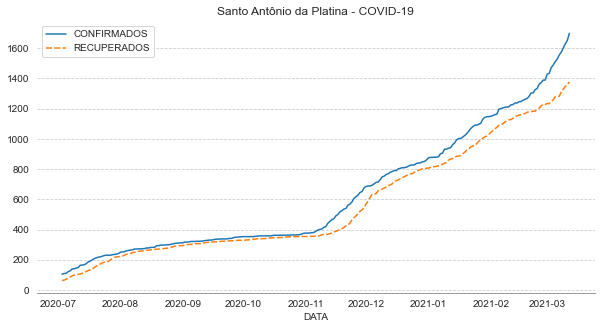

In [16]:
ax = sns.lineplot(data=frame[['CONFIRMADOS','RECUPERADOS']],
             palette="tab10"
            )
_ = ax.set_title("Santo Antônio da Platina - COVID-19")
ax.xaxis.grid()
sns.despine(left=True)

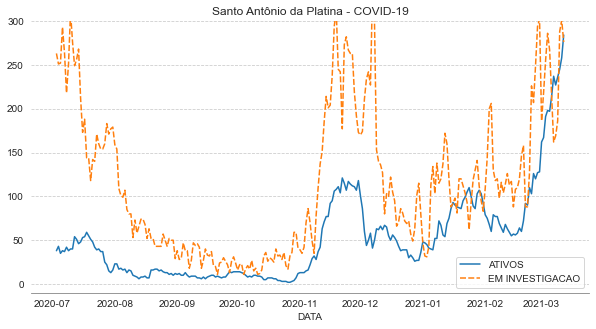

In [17]:
ax = sns.lineplot(data=frame[['ATIVOS','EM INVESTIGACAO']],
             palette="tab10"
            )
_ = ax.set_title("Santo Antônio da Platina - COVID-19")
ax.set_ylim([-10, 300])
ax.xaxis.grid()
sns.despine(left=True)

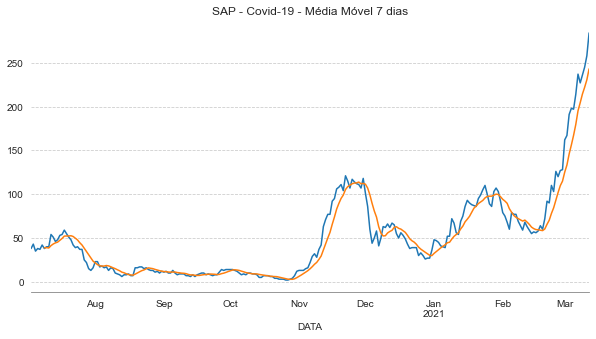

In [18]:
dias = 7

ax = frame['ATIVOS'].plot()
ax = frame['ATIVOS'].rolling(dias).mean().plot()

_ = ax.set_title(f"SAP - Covid-19 - Média Móvel {dias} dias")
ax.xaxis.grid()
sns.despine(left=True)

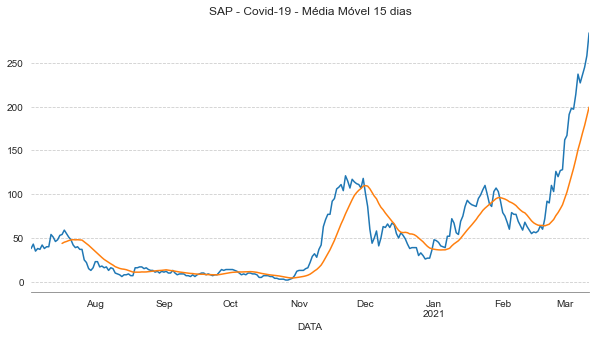

In [19]:
dias = 15

ax = frame['ATIVOS'].plot()
ax = frame['ATIVOS'].rolling(dias).mean().plot()

_ = ax.set_title(f"SAP - Covid-19 - Média Móvel {dias} dias")
ax.xaxis.grid()
sns.despine(left=True)

In [20]:
def diff(x):
#     print(x)
    return x[1] - x[0]

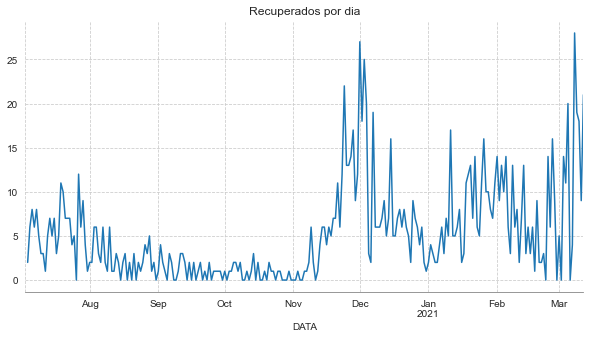

In [21]:
df = frame['RECUPERADOS'].rolling(2).apply(diff)

ax = df.plot()
_ = ax.set_title(f"Recuperados por dia")
sns.despine(left=True)

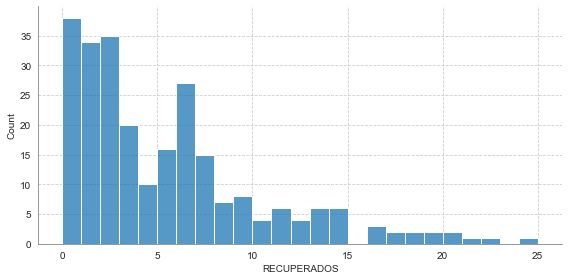

In [22]:
bins = range(0, 26)
ax = sns.displot(df, height=4, aspect=2, bins=bins)

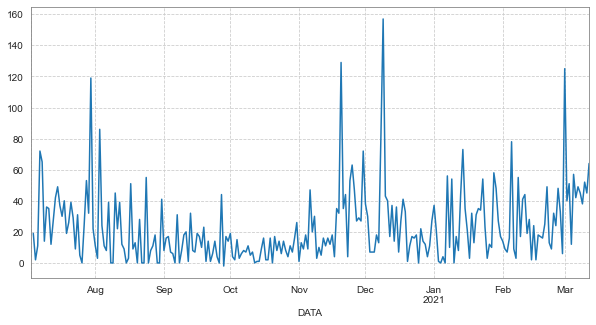

In [23]:
df = frame['DESCARTADOS'].rolling(2).apply(diff)

plt.figure(figsize=(10,5))

ax = df.plot()

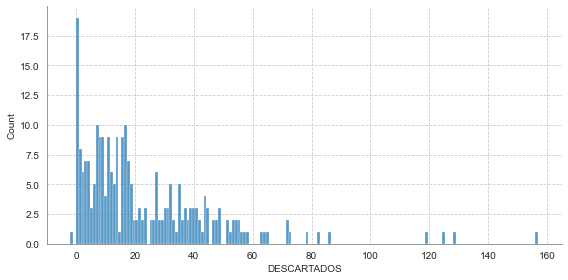

In [24]:
ax = sns.displot(df, height=4, aspect=2, bins=165)

In [25]:
df[df < 0]

DATA
2020-09-28   -2.0
Name: DESCARTADOS, dtype: float64

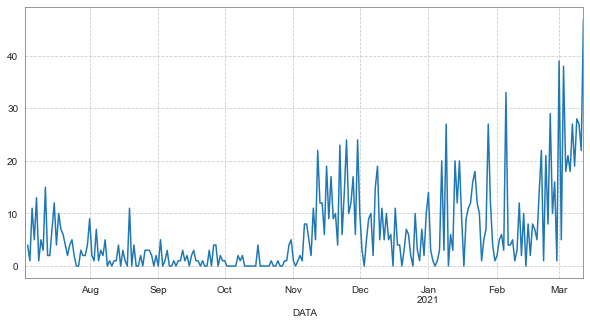

In [26]:
df = frame['CONFIRMADOS'].rolling(2).apply(diff)

plt.figure(figsize=(10,5))

ax = df.plot()

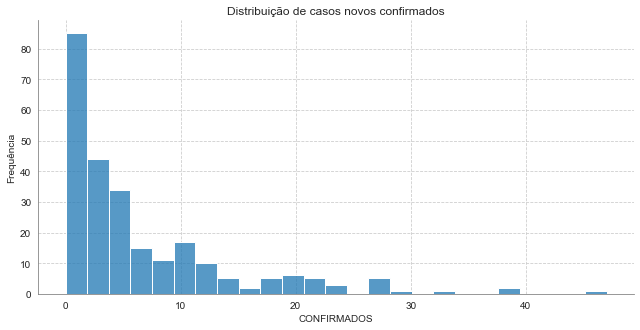

In [27]:
ax = sns.displot(df, height=4.5, aspect=2, bins=25)

ax.set_ylabels("Frequência")

ax.set(title = "Distribuição de casos novos confirmados")

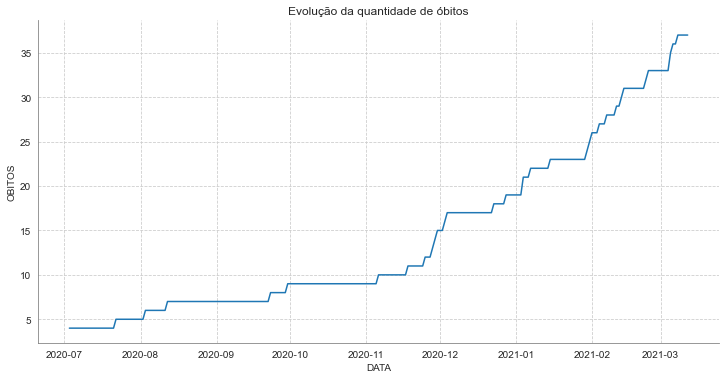

In [28]:
ax = sns.relplot(kind="line", data=frame['OBITOS'], height=5, aspect=2)

# ax.set(yticks=range(4,20))

_ = ax.set(title="Evolução da quantidade de óbitos")

In [29]:
deaths = frame['OBITOS'].diff(periods=1)

deaths.head()

DATA
2020-07-03    NaN
2020-07-04    0.0
2020-07-05    0.0
2020-07-06    0.0
2020-07-07    0.0
Name: OBITOS, dtype: float64

In [30]:
groupdeaths = deaths.groupby([(deaths.index.year),(deaths.index.month)]).sum()

In [31]:
def formatter(label):
    yearDict = {
        2020 : '20',
        2021 : '21'
    }
    monthDict = {
        1:'Jan', 
        2:'Fev', 
        3:'Mar', 
        4:'Abr', 
        5:'Maio', 
        6:'Jun', 
        7:'Jul', 
        8:'Ago', 
        9:'Set', 
        10:'Out', 
        11:'Nov', 
        12:'Dez'}

    return f"{monthDict[label[1]]} {yearDict[label[0]]}"

formatter((2020, 7))

'Jul 20'

In [32]:
labels = [formatter(label) for label in groupdeaths.index]

labels

['Jul 20',
 'Ago 20',
 'Set 20',
 'Out 20',
 'Nov 20',
 'Dez 20',
 'Jan 21',
 'Fev 21',
 'Mar 21']

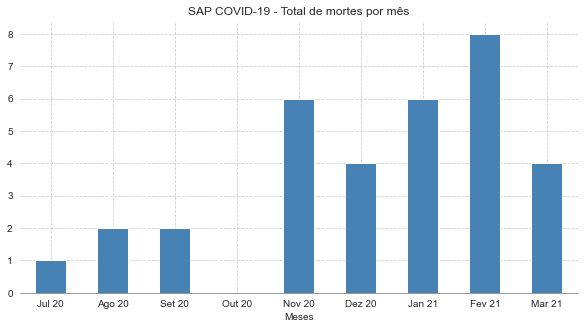

In [33]:

ax = groupdeaths.plot(kind='bar', color='steelblue')

ax.set(title='SAP COVID-19 - Total de mortes por mês')
ax.set_xticklabels(labels)
ax.set_xlabel("Meses")
ax.tick_params(axis="x", rotation=0)
sns.despine(left=True)